# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [1]:
# naložimo paket
import pandas as pd
import numpy as np

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
%matplotlib notebook

# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv('../../02-zajem-podatkov/predavanja/obdelani-podatki/filmi.csv')

Poglejmo si podatke.

In [2]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question..."
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [3]:
filmi.sort_values(['ocena', 'glasovi'])

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
9896,7221896,Cumali Ceber: Allah Seni Alsin,100,2017,1.0,NaN,37198,NaN,NaN,Cumali Ceber goes to a vacation with his child...
9726,6038600,Smolensk,120,2016,1.4,NaN,7417,NaN,NaN,Inspired by true events of 2010 Polish Air For...
9237,4009460,Saving Christmas,79,2014,1.4,18.0,14365,2783970.0,PG,His annual Christmas party faltering thanks to...
9354,4458206,Kod Adi K.O.Z.,114,2015,1.4,NaN,26817,NaN,NaN,A look at the 17-25 December 2013 corruption s...
9718,5988370,Reis,108,2017,1.5,NaN,71969,NaN,NaN,A drama about the early life of Recep Tayyip E...
...,...,...,...,...,...,...,...,...,...,...
9946,7738784,Peranbu,147,2018,9.3,NaN,10415,NaN,NaN,"A single father tries to raise his daughter, w..."
8284,2170667,Wheels,115,2014,9.3,NaN,17371,NaN,R,Two suicidal paraplegic junkies hustle their w...
2830,111161,Kaznilnica odrešitve,142,1994,9.3,80.0,2136999,28341469.0,R,Two imprisoned men bond over a number of years...
4196,252487,Hababam Sinifi,87,1975,9.4,NaN,34256,NaN,NaN,"Lazy, uneducated students share a very close b..."


Poberite stolpec ocen.

In [4]:
filmi[['ocena']]

,ocena
0,6.4
1,7.8
2,7.4
3,8.1
4,8.3
...,...
9995,6.2
9996,4.3
9997,7.2
9998,5.6


Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [5]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [6]:
ocene_rounded = round(filmi['ocena'])
ocene_rounded

0       6.0
1       8.0
2       7.0
3       8.0
4       8.0
       ... 
9995    6.0
9996    4.0
9997    7.0
9998    6.0
9999    8.0
Name: ocena, Length: 10000, dtype: float64

Dodajte zaokrožene vrednosti v podatke.

In [7]:
filmi['rounded_ocene'] = ocene_rounded
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,rounded_ocene
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...,6.0
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ...",4.0
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question...",7.0
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...,6.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [8]:
filmi.drop(columns=['rounded_ocene'])

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question..."
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [9]:
core_filmi = filmi[['naslov', 'leto', 'glasovi']]
core_filmi

,naslov,leto,glasovi
0,The Birth of a Nation,1915,20737
1,Intolerance: Love's Struggle Throughout the Ages,1916,13031
2,Broken Blossoms or The Yellow Man and the Girl,1919,8700
3,Das Cabinet des Dr. Caligari,1920,50866
4,The Kid,1921,100210
...,...,...,...
9995,Between Two Ferns: The Movie,2019,7319
9996,Secret Obsession,2019,13308
9997,Black Mirror: Bandersnatch,2018,96998
9998,Falling Inn Love,2019,7389


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [10]:
before = filmi['leto'] <= 1930
after = filmi['leto'] >= 2017
filmi[before | after]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,rounded_ocene
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...,6.0
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ...",4.0
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question...",7.0
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...,6.0


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [11]:
def ima_manj_kot_num_besed(x, num=2):
    return len(x.split()) <= num
    
    
is_short = filmi['naslov'].apply(ima_manj_kot_num_besed)

filmi[is_short & (filmi['ocena'] > 8)]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,rounded_ocene
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
5,12364,Körkarlen,100,1921,8.1,NaN,9106,NaN,NaN,"On New Year's Eve, the driver of a ghostly car...",8.0
12,15324,Sherlock Jr.,45,1924,8.2,NaN,34452,977375.0,NaN,"A film projectionist longs to be a detective, ...",8.0
14,15864,Zlata mrzlica,95,1925,8.2,NaN,91091,5450000.0,NaN,A prospector goes to the Klondike in search of...,8.0
15,15881,Greed,140,1924,8.1,NaN,8374,161800.0,NaN,The sudden fortune won from a lottery fans suc...,8.0
...,...,...,...,...,...,...,...,...,...,...,...
9973,8239946,Tumbbad,104,2018,8.2,NaN,15677,NaN,NaN,A mythological story about a goddess who creat...,8.0
9976,8267604,Capharnaüm,126,2018,8.4,75.0,27308,1661096.0,R,While serving a five-year sentence for a viole...,8.0
9987,8637428,The Farewell,100,2019,8.1,89.0,6892,16877010.0,PG,A Chinese family discovers their grandmother h...,8.0
9994,9052870,Chhichhore,143,2019,8.6,NaN,6719,898575.0,NaN,Following a group of friends from university a...,9.0


### Histogrami

Združite filme po ocenah in jih preštejte.

In [12]:
po_ocenah = filmi.groupby('ocena').size()

Naredite stolpični diagram teh podatkov.

<IPython.core.display.Javascript object>


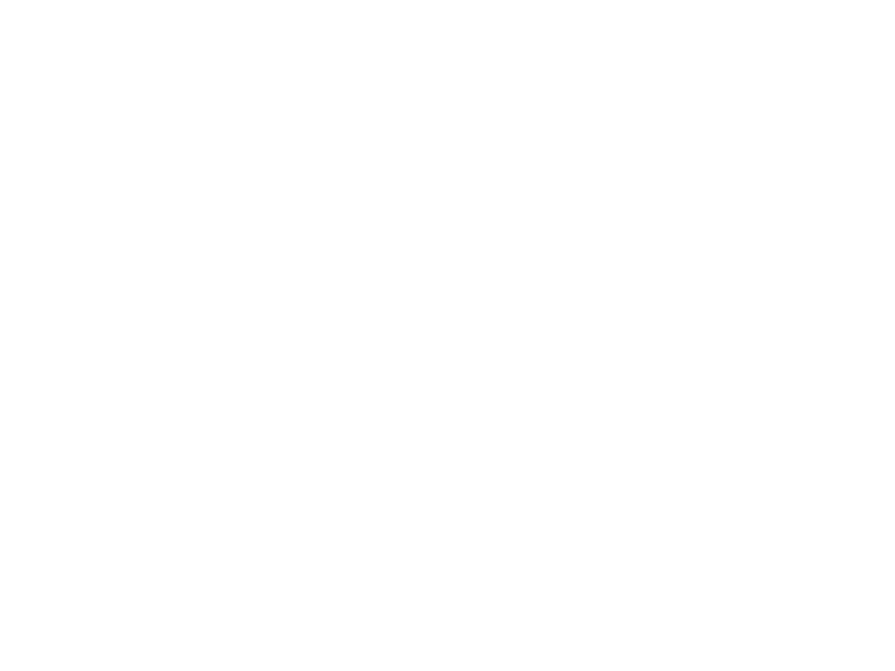

In [13]:
po_ocenah.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

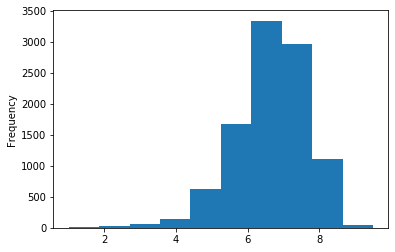

In [14]:
%matplotlib inline
filmi['ocena'].plot.hist()

### Izris povprečne dolžine filma glede na leto

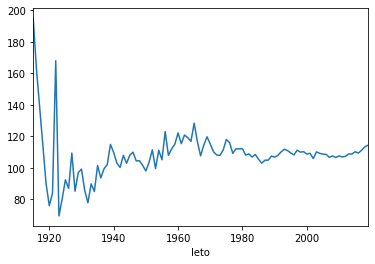

In [15]:
(filmi.groupby('leto').mean()['dolzina']).plot()

### Izris skupnega zasluzka za posamezno leto

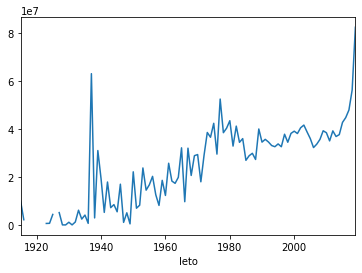

In [16]:
(filmi.groupby('leto').mean()['zasluzek']).plot()